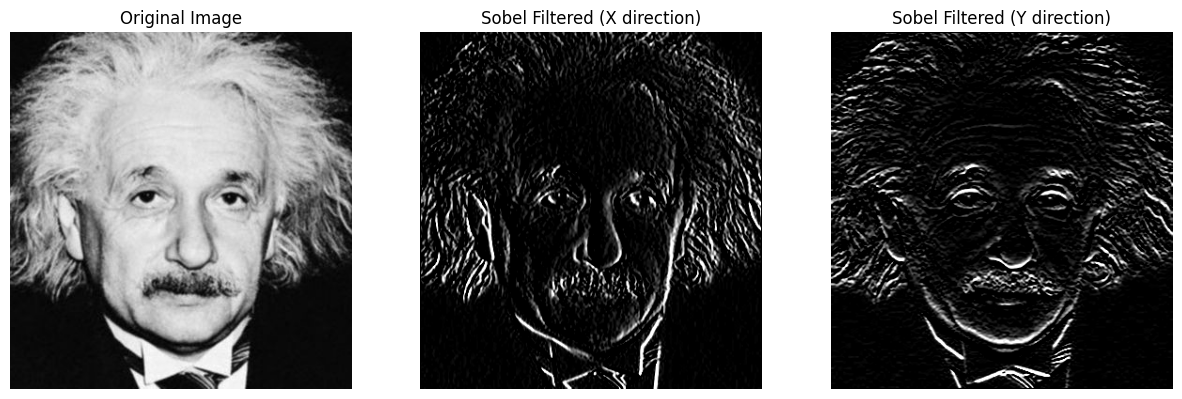

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/einstein.png"
einstein_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if einstein_image is None:
    raise FileNotFoundError("The image could not be found at the specified path.")

# Define Sobel kernels for X and Y direction edge detection
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

# Apply Sobel filters using the filter2D function
sobel_x_image = cv.filter2D(einstein_image, -1, sobel_kernel_x)
sobel_y_image = cv.filter2D(einstein_image, -1, sobel_kernel_y)

# Plot the original image and the Sobel-filtered images (X and Y directions)
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(einstein_image, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

# Display the Sobel-filtered image in the X direction
plt.subplot(1, 3, 2)
plt.imshow(sobel_x_image, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel Filtered (X direction)')
plt.axis('off')

# Display the Sobel-filtered image in the Y direction
plt.subplot(1, 3, 3)
plt.imshow(sobel_y_image, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel Filtered (Y direction)')
plt.axis('off')

plt.show()


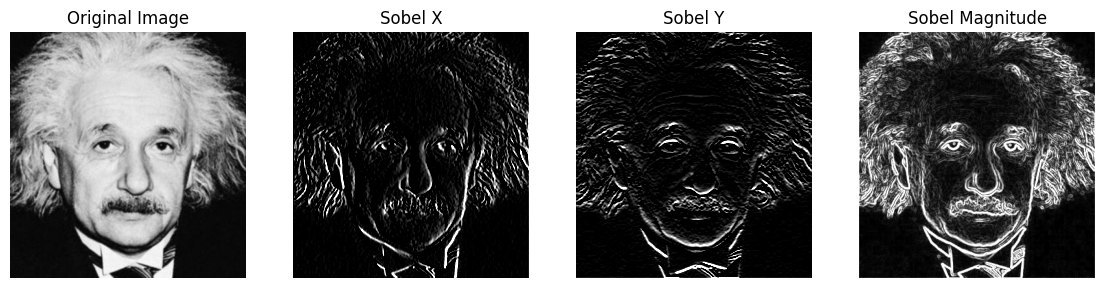

In [15]:
# Define the Sobel kernels for the X and Y directions
sobel_kernel_x = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                            [0, 0, 0],
                            [-1, -2, -1]])

# Get image dimensions
height, width = einstein_image.shape

# Initialize arrays to hold the results
sobel_x = np.zeros_like(einstein_image, dtype=np.float64)
sobel_y = np.zeros_like(albert_img, dtype=np.float64)

# Pad the image to handle edges
padded_image = np.pad(einstein_image, ((1, 1), (1, 1)), mode='constant')

# Apply the Sobel filter in the X direction
for i in range(height):
    for j in range(width):
        sobel_x[i, j] = np.sum(padded_image[i:i+3, j:j+3] * sobel_kernel_x)

# Apply the Sobel filter in the Y direction
for i in range(height):
    for j in range(width):
        sobel_y[i, j] = np.sum(padded_image[i:i+3, j:j+3] * sobel_kernel_y)

# Calculate the magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 4, 1)
plt.imshow(einstein_image, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')  # Hide axes

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel X')
plt.axis('off')  # Hide axes

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel Y')
plt.axis('off')  # Hide axes

plt.subplot(1, 4, 4)
plt.imshow(sobel_magnitude, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel Magnitude')
plt.axis('off')  # Hide axes

plt.show()


#### Seperable Method

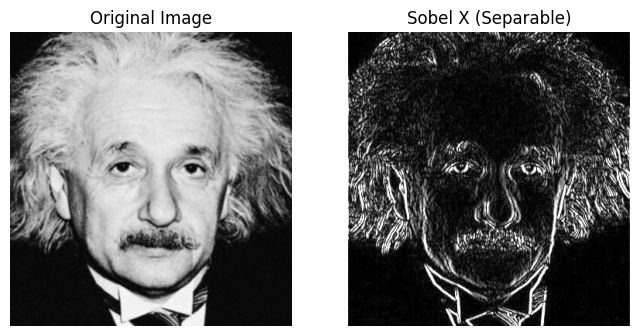

In [22]:
# Define the 1D Sobel kernels (separable)
sobel_vertical = np.array([1, 2, 1])  # Vertical kernel for smoothing
sobel_horizontal = np.array([1, 0, -1])  # Horizontal kernel for edge detection

# Get image dimensions
height, width = einstein_image.shape

# Initialize empty arrays to hold intermediate and final results
intermediate_vertical = np.zeros_like(einstein_image, dtype=np.float64)
sobel_result = np.zeros_like(einstein_image, dtype=np.float64)

# Pad the image to manage the edges for vertical filtering
padded_image = np.pad(einstein_image, ((1, 1), (0, 0)), mode='constant')

# Step 1: Apply the vertical 1D kernel (along the rows)
for row in range(1, height + 1):
    for col in range(width):
        # Apply the vertical kernel to the 3-pixel neighborhood in the column
        intermediate_vertical[row - 1, col] = np.sum(padded_image[row - 1:row + 2, col] * sobel_vertical)

# Pad the intermediate result for horizontal filtering
padded_intermediate = np.pad(intermediate_vertical, ((0, 0), (1, 1)), mode='constant')

# Step 2: Apply the horizontal 1D kernel (along the columns)
for row in range(height):
    for col in range(1, width + 1):
        # Apply the horizontal kernel to the 3-pixel neighborhood in the row
        sobel_result[row, col - 1] = np.sum(padded_intermediate[row, col - 1:col + 2] * sobel_horizontal)

# Convert the final result back to uint8 format, normalizing values to 0-255
sobel_result = np.uint8(np.clip(np.abs(sobel_result), 0, 255))

# Plotting the results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(einstein_image, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray',vmin=0, vmax=255)
plt.title('Sobel X (Separable)')
plt.axis('off')  # Hide axes

plt.show()
